In [1]:
pip install seaborn

In [2]:
pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics

In [5]:
df = pd.read_csv('african_crises.csv')
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [6]:
df.shape

(1059, 14)

In [7]:
df.country.unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [9]:
#mengubah data int dan objct menjadi data kategorik
df['systemic_crisis'] = df['systemic_crisis'].astype('category')
df['domestic_debt_in_default'] = df['domestic_debt_in_default'].astype('category')
df['sovereign_external_debt_default'] = df['sovereign_external_debt_default'].astype('category')
df['independence'] = df['independence'].astype('category')
df['currency_crises'] = df['currency_crises'].astype('category')
df['inflation_crises'] = df['inflation_crises'].astype('category')
df['banking_crisis'] = df['banking_crisis'].astype('category')

In [10]:
#tabel dengan data type yang baru
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   case                             1059 non-null   int64   
 1   cc3                              1059 non-null   object  
 2   country                          1059 non-null   object  
 3   year                             1059 non-null   int64   
 4   systemic_crisis                  1059 non-null   category
 5   exch_usd                         1059 non-null   float64 
 6   domestic_debt_in_default         1059 non-null   category
 7   sovereign_external_debt_default  1059 non-null   category
 8   gdp_weighted_default             1059 non-null   float64 
 9   inflation_annual_cpi             1059 non-null   float64 
 10  independence                     1059 non-null   category
 11  currency_crises                  1059 non-null   category
 12  inflat

In [11]:
df.describe(include = 'all')

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059,1059,1059.000000,1059.0,1059.000000,1059.0,1059.0,1059.000000,1.059000e+03,1059.0,1059.0,1059.0,1059
unique,NaN,13,13,NaN,2.0,NaN,2.0,2.0,NaN,NaN,2.0,3.0,2.0,2
top,NaN,EGY,Egypt,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0,0.0,no_crisis
freq,NaN,155,155,NaN,977.0,NaN,1017.0,897.0,NaN,NaN,822.0,923.0,922.0,965
mean,35.613787,NaN,NaN,1967.767705,NaN,43.140831,NaN,NaN,0.006402,2.084889e+04,NaN,NaN,NaN,NaN
std,23.692402,NaN,NaN,33.530632,NaN,111.475380,NaN,NaN,0.043572,6.757274e+05,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1860.000000,NaN,0.000000,NaN,NaN,0.000000,-2.850214e+01,NaN,NaN,NaN,NaN
25%,15.000000,NaN,NaN,1951.000000,NaN,0.195350,NaN,NaN,0.000000,2.086162e+00,NaN,NaN,NaN,NaN
50%,38.000000,NaN,NaN,1973.000000,NaN,0.868400,NaN,NaN,0.000000,5.762330e+00,NaN,NaN,NaN,NaN
75%,56.000000,NaN,NaN,1994.000000,NaN,8.462750,NaN,NaN,0.000000,1.164405e+01,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [13]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [14]:
code = {
    'crisis' : 1,
    'no_crisis' : 0,
     False : 0,
     True : 1
}
def encoding(df):
    df['banking_crisis'] = df['banking_crisis'].map(code)
    return df
df = encoding(df)

In [15]:
df.drop(columns=['case','cc3'], axis=1, inplace=True)
df.head(3)

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0


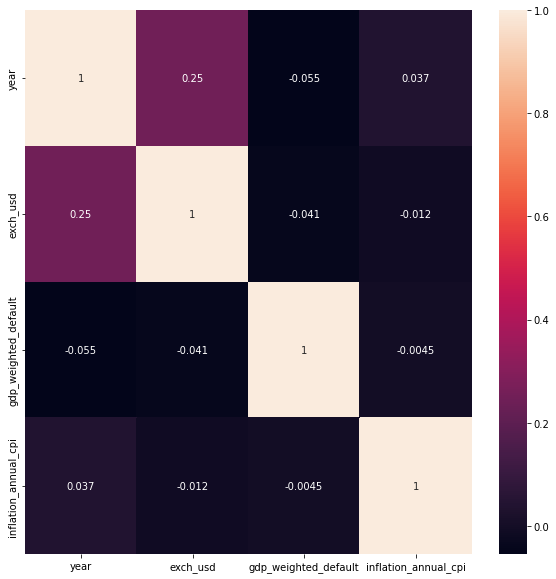

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

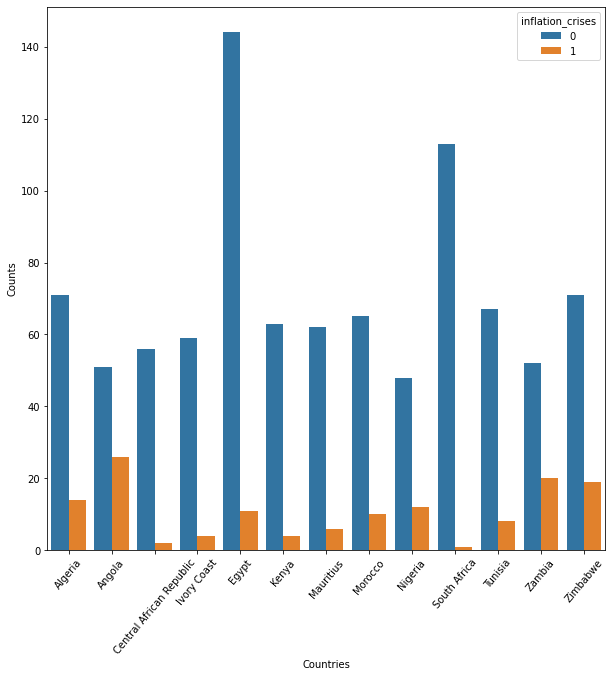

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(df['country'],hue=df['inflation_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

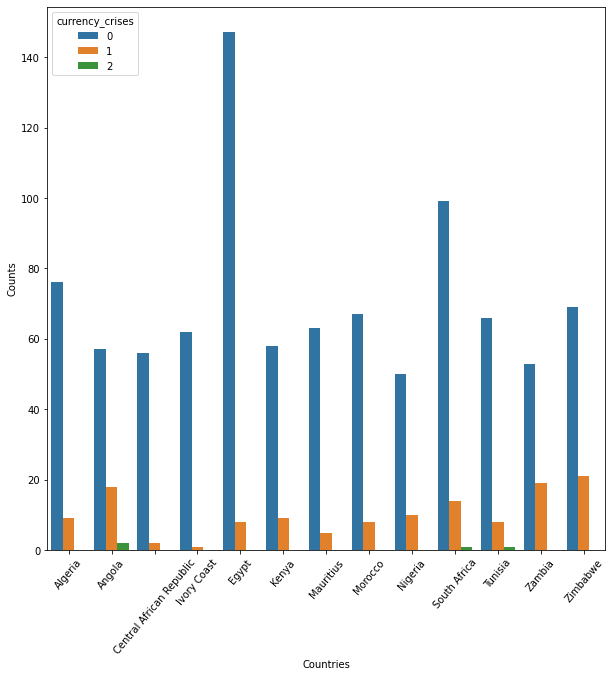

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(df['country'],hue=df['currency_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

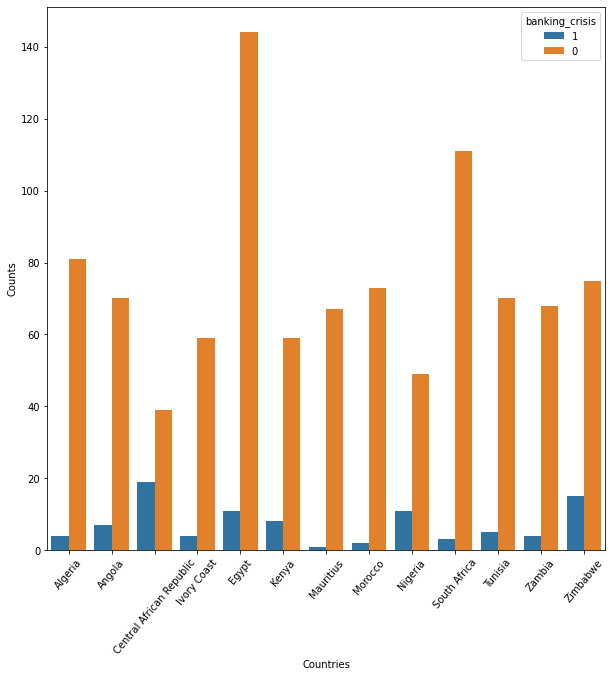

In [19]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(df['country'],hue=df['banking_crisis'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

In [20]:
df.drop(columns=['country'], axis=1, inplace=True)
x=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0) # 75% training and 25% test

In [21]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf)
print(clf.fit)
print(y_pred)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
<bound method BaseLibSVM.fit of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>
[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

In [22]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       239
           1       0.88      0.85      0.86        26

    accuracy                           0.97       265
   macro avg       0.93      0.92      0.92       265
weighted avg       0.97      0.97      0.97       265




Confusion matrix:
[[236   3]
 [  4  22]]


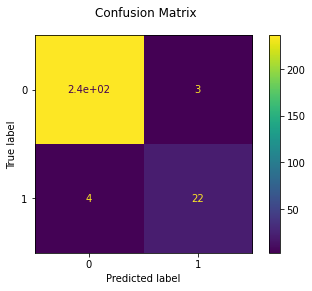

In [23]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [24]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

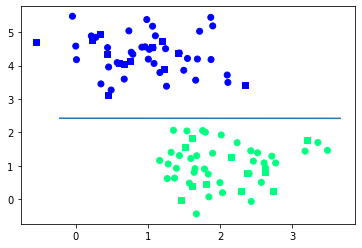

In [26]:
x, y = make_blobs(n_samples=100, centers=2, cluster_std=0.60, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0) # 75% training and 25% test

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

ax = plt.gca()
xlim = ax.get_xlim()

ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', marker='s')

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (svc.intercept_[0] / w[1])
plt.plot(xx, yy)
plt.show()

In [27]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['banking_crisis'], axis=1),
    df['banking_crisis'],
    test_size=0.3,
    random_state=0)

In [28]:
X_train.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
899,1945,0,0.000497,0,0,0.0,2.702703,0,0,0
635,2002,0,10.167000,0,0,0.0,2.779000,1,0,0
310,1887,0,0.199900,0,0,0.0,-2.840799,1,0,0
961,2007,0,3.830000,0,0,0.0,10.655000,1,0,0
723,1915,0,0.206300,0,0,0.0,4.872759,1,0,0


In [29]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.06685774, 0.19209565, 0.0872187 , 0.0029656 , 0.02134462,
       0.        , 0.02116358, 0.02129167, 0.00341497, 0.00716519])

In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

systemic_crisis                    0.192096
exch_usd                           0.087219
year                               0.066858
sovereign_external_debt_default    0.021345
independence                       0.021292
inflation_annual_cpi               0.021164
inflation_crises                   0.007165
currency_crises                    0.003415
domestic_debt_in_default           0.002966
gdp_weighted_default               0.000000
dtype: float64

In [31]:
0.001427 + 0.003870 + 0.011124 + 0.014044 + 0.026345 + 0.031647 + 0.054526 + 0.058329 + 0.198914

0.40022599999999997

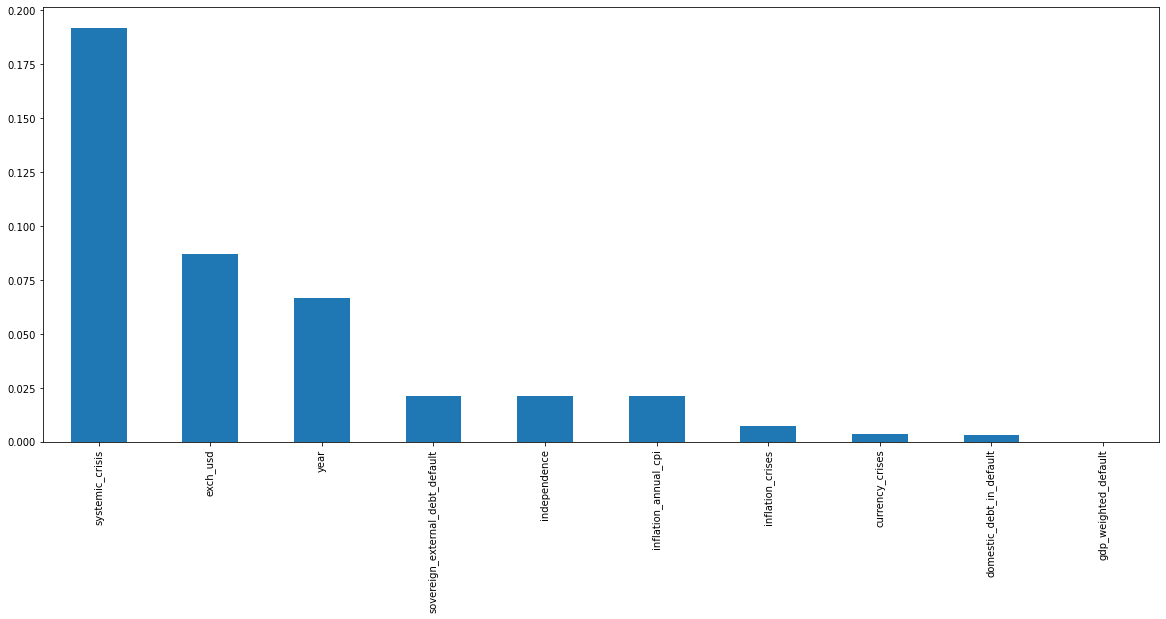

In [32]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [33]:
from sklearn.feature_selection import SelectKBest

In [34]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['year', 'systemic_crisis', 'exch_usd',
       'sovereign_external_debt_default', 'inflation_annual_cpi'],
      dtype='object')